In [3]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


([], <a list of 0 Text major ticklabel objects>)

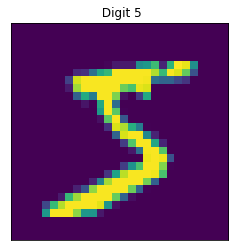

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0] )
plt.title(" Digit " + str(y_train[0]) )
plt.xticks([])
plt.yticks([])

In [6]:
X_train[0][18]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [7]:
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
X_train[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980395],
       [0.7176471 ],
       [0.99215686],
       [0.99215686],
       [0.8117647 ],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [9]:
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from keras.models import Sequential
classifier = Sequential()
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, BatchNormalization
classifier.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
BatchNormalization(axis=-1) #Axis -1 is always the features axis
classifier.add(Activation('relu'))
 
classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [13]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator
# applying transformation to image
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

In [15]:
training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [16]:
classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
937/937 [==============================] - 194s 206ms/step - loss: 0.2119 - accuracy: 0.9319 - val_loss: 0.0561 - val_accuracy: 0.9808
Epoch 2/5
937/937 [==============================] - 180s 192ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.0432 - val_accuracy: 0.9866
Epoch 3/5
937/937 [==============================] - 178s 190ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 4/5
937/937 [==============================] - 177s 189ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0370 - val_accuracy: 0.9878
Epoch 5/5
937/937 [==============================] - 178s 190ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0312 - val_accuracy: 0.9888
